In [ ]:
#numpy and pandas
import numpy as np
import pandas as pd

#for plotting
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("bank.csv") 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
# We are interested in the data where customers subcribed a term deposit. 
df_sorted = df[df['deposit']=='yes']
df_sorted

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,retired,divorced,primary,no,1389,no,no,cellular,8,apr,335,1,-1,0,unknown,yes
5285,30,management,single,tertiary,no,398,no,no,cellular,27,oct,102,1,180,3,success,yes
5286,69,retired,divorced,tertiary,no,247,no,no,cellular,22,apr,138,2,-1,0,unknown,yes
5287,48,entrepreneur,married,secondary,no,0,no,yes,cellular,28,jul,431,2,-1,0,unknown,yes


In [ ]:
#Get our X and Y values in order to analyze the relationship between age, balance and duration.
X1 = df_sorted['age'].values
X2 = df_sorted['balance'].values
Y = df_sorted['duration'].values

In [ ]:
#Reshape the values to a column array
X1 = X1.reshape((-1,1))
X2 = X2.reshape((-1,1))

In [ ]:
# Create our training model for each variable using 80% of the data 
# Create our testing model for each variable using 20% of the data 

trainx1 = X1[0:4231].reshape((4231,1)) 
testx1 = X1[4231:].reshape((1058,1)) 

trainx2 = X2[0:4231].reshape((4231,1))
testx2 = X2[4231:].reshape((1058,1)) 

trainy = Y[0:4231].reshape((4231,1))
testy = Y[4231:].reshape((1058,1))

trainones = np.ones((4231, 1), dtype=int) 

trainpredx1 = np.append(trainones, trainx1, axis=1)
trainpredx2 = np.append(trainones, trainx2, axis=1)

# These create different weights for each respective univariate regression
w1 = np.linalg.lstsq(trainpredx1, trainy, rcond=None)[0] 
w2 = np.linalg.lstsq(trainpredx2, trainy, rcond=None)[0]

In [ ]:
# Calculates MSE of training and test data

trainy_predict1 = w1[0] + w1[1] * trainx1 
trainy_predict2 = w2[0] + w2[1] * trainx2

testy_predict1 = w1[0] + w1[1] * testx1
testy_predict2 = w2[0] + w2[1] * testx2

trainSSE1 = sum((trainy_predict1 - trainy) ** 2)
trainMSE1 = trainSSE1 / len(trainy)

trainSSE2 = sum((trainy_predict2 - trainy) ** 2)
trainMSE2 = trainSSE2 / len(trainy)

testSSE1 = sum((testy_predict1 - testy) ** 2)
testMSE1 = testSSE1 / len(testy)

testSSE2 = sum((testy_predict2 - testy) ** 2)
testMSE2 = testSSE2 / len(testy)

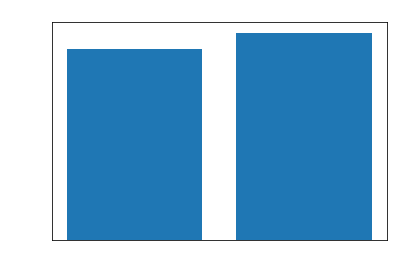

In [ ]:
# Creates MSE plot for Age vs. Duration

data1 = [trainMSE1[0], testMSE1[0]]
labels = ['Train MSE', 'Test MSE']

plt.bar(labels, data1)
plt.title('MSE for Age vs Duration').set_color('white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

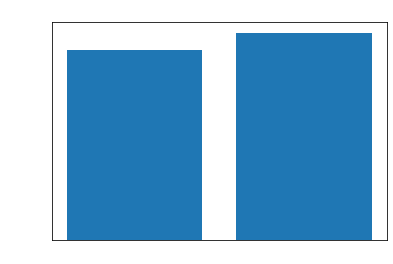

In [ ]:
# Creates MSE plot for Balance vs. Duration
data2 = [trainMSE2[0], testMSE2[0]]
labels = ['Train MSE', 'Test MSE']

plt.bar(labels, data2)
plt.title('MSE for Balance vs Duration').set_color('white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

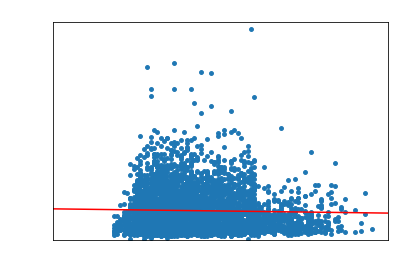

In [ ]:
# Age vs. Duration regression (training data)
x = np.linspace(0, 5289, 5289)

y1 = w1[0] + w1[1] * x

plt.plot(x, y1, c='r')
plt.scatter(trainx1, trainy, s=15)
plt.title('Age vs Duration (training data)').set_color('white')
plt.xlim((0,100))
plt.ylim((0,4000))
plt.xlabel('Age').set_color('white')
plt.ylabel('Duration (minutes)').set_color('white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

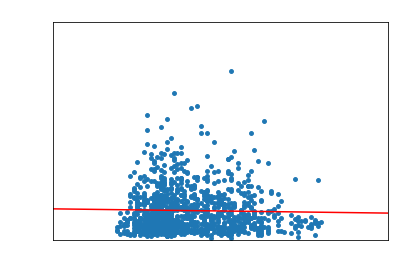

In [ ]:
# Age vs. Duration regression (test data)

x = np.linspace(0, 5289, 5289)

y1 = w1[0] + w1[1] * x

plt.plot(x, y1, c='r')
plt.scatter(testx1, testy, s=15)
plt.title('Age vs Duration (test data)').set_color('white')
plt.xlim((0,100))
plt.ylim((0,4000))
plt.xlabel('Age').set_color('white')
plt.ylabel('Duration (minutes)').set_color('white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

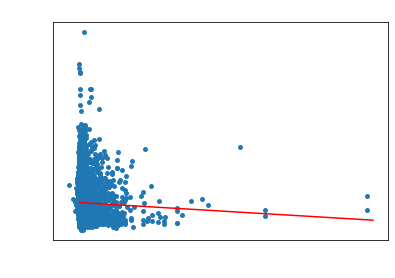

In [ ]:
# Balance vs. Duration regression (training data)

x_large = np.linspace(0, 83000, 83000)

y2 = w2[0] + w2[1] * x_large

plt.plot(x_large, y2, c='r')
plt.scatter(trainx2, trainy, s=15)
plt.title('Balance vs Duration (training data)').set_color('white')
plt.ylabel('Duration (minutes)').set_color('white')
plt.xlabel('Balance').set_color('white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

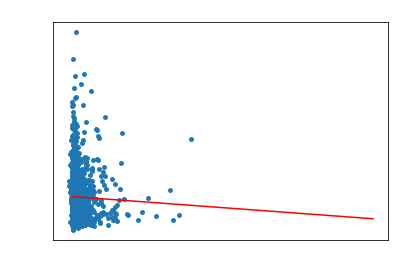

In [ ]:
# Balance vs. Duration regression (test data)

x_large = np.linspace(0, 83000, 83000)

y2 = w2[0] + w2[1] * x_large

plt.plot(x_large, y2, c='r')
plt.scatter(testx2, testy, s=15)
plt.title('Balance vs Duration (test data)').set_color('white')
plt.ylabel('Duration (minutes)').set_color('white')
plt.xlabel('Balance').set_color('white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')